In [47]:
import matplotlib.pyplot as plt
import numpy as np
import corner
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

ABC_Method_Uniform_Prior de: https://towardsdatascience.com/the-abcs-of-approximate-bayesian-computation-bfe11b8ca341

In [2]:
#Distance function - Absolute difference 
def distance_function(X,Y):
    distance = (1/len(X))*abs(sum(X)-sum(Y))
    return distance

#The ABC method with uniform prior, returns samples from the posterior
def ABC_Method_Uniform_Prior(Observed_data,Number_of_Samples,threshold):
    #The observed data 
    #initialise Posterior array
    Posterior_distribution = []
    #trials
    n = len(Observed_data) 
    #loop through to get the samples. 
    for i in range(0, Number_of_Samples):
        distance = threshold+1
        #While the distance is greater than the threshold continue to sample theta from the beta distribution
        while distance > threshold:
            #sample theta from the prior
            theta = np.random.beta(1, 1, size=1)[0]
            # generate the sim data 
            X = np.random.binomial(1, theta, n)
            # calcalute the distance from Y 
            distance = distance_function(X,Observed_data)
        Posterior_distribution.append(theta)
    return Posterior_distribution

In [37]:
data = np.random.normal(loc=-0.1, scale=2, size=1000) + np.random.rand()


(array([  4.,  11.,  46., 127., 229., 284., 183.,  86.,  28.,   2.]),
 array([-6.37649978, -5.01093626, -3.64537273, -2.27980921, -0.91424569,
         0.45131784,  1.81688136,  3.18244488,  4.54800841,  5.91357193,
         7.27913545]),
 <a list of 10 Patch objects>)

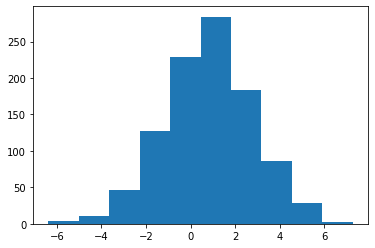

In [38]:
plt.hist(data)

In [28]:
data = np.concatenate((x,y), axis=1)
np.shape(data)

(100, 2)

In [34]:
sampling = ABC_Method_Uniform_Prior(data, 100, 0.1)

(array([ 1.,  7.,  2.,  6., 12., 18., 13., 17., 12., 12.]),
 array([0.79731136, 0.81737439, 0.83743743, 0.85750046, 0.8775635 ,
        0.89762654, 0.91768957, 0.93775261, 0.95781564, 0.97787868,
        0.99794171]),
 <a list of 10 Patch objects>)

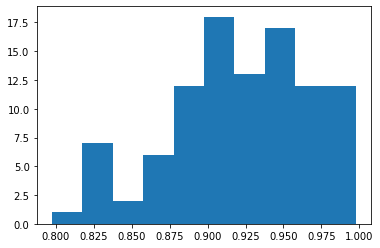

In [35]:
plt.hist(sampling)